## Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib.font_manager

In [3]:
plt.rcParams.update({'font.family':'sans-serif','font.size':14})

## Importing Data and Preprocessing

In [4]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.isnull().sum()
## Null values not available in the dataset

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.duplicated(keep=False).sum()

34

In [ ]:
## 14 duplicate rows present but since there is no unique ID, considering them as differnent purchases

In [8]:
df['Postal Code'] = df['Postal Code'].astype('object')

## Descriptive Statistics and Correlation

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [10]:
df.describe(include=object).transpose()

,count,unique,top,freq
Ship Mode,9994,4,Standard Class,5968
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001
Postal Code,9994,631,10035,263
Region,9994,4,West,3203
Category,9994,3,Office Supplies,6026
Sub-Category,9994,17,Binders,1523


In [11]:
## Country columns has only one unique value - United States.
## Hence, either the shop is only in United States (or) only US data is available to us
## The united States the data covers all regions, major cities and pincodes
## 17 sub-category of products across 3 main categories are in the data
## Purchases are processed in 4 different type of shipping mode

In [12]:
corre = df.corr()
corre

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [13]:
## Sales have moderate positive correaltion with profit
## Sales and profit have negative correlatio with discount

<Figure size 864x864 with 0 Axes>

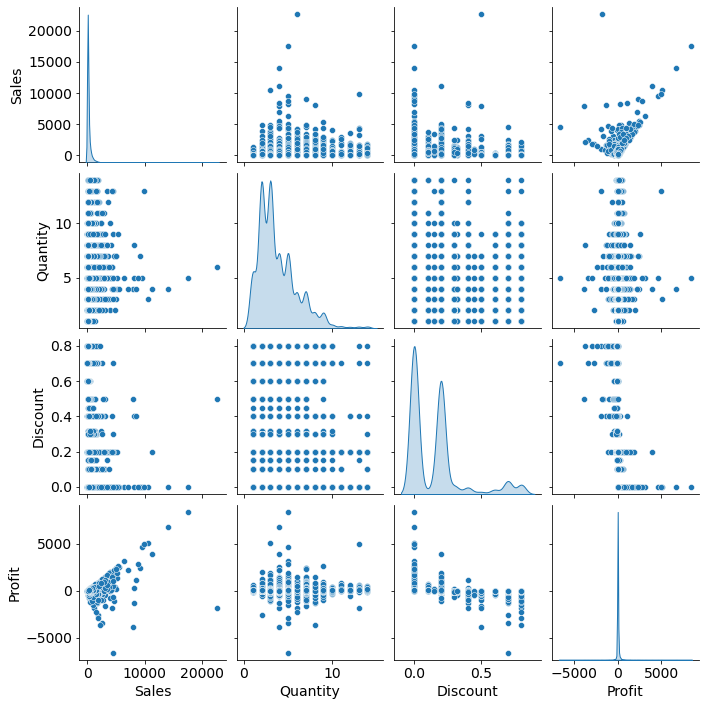

In [14]:
plt.figure(figsize=(12,12))
sns.pairplot(df.drop(columns='Postal Code'),diag_kind='kde')
plt.show()

# Bivariate and Multi Variate Analysis

## Analysis based on Quantity sold

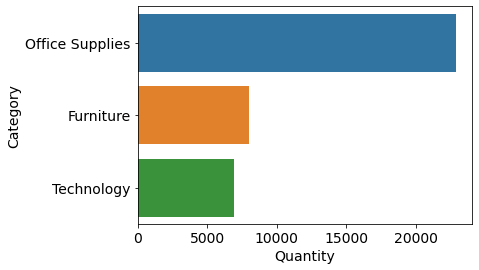

In [15]:
quant_cat = df.groupby(['Category']).Quantity.sum().sort_values(ascending=False)
sns.barplot(x=quant_cat,y=quant_cat.index)
plt.show()

In [ ]:
## Office supplies has more 3x count of sales compared to others two categories individually

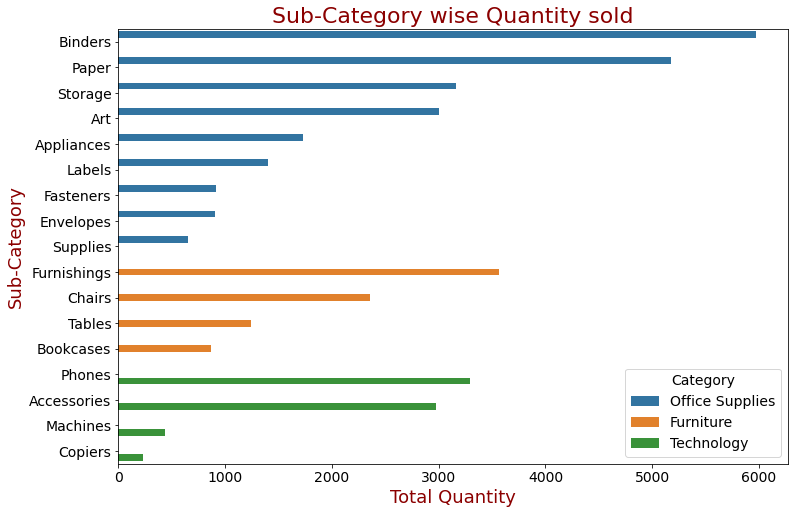

In [16]:
quant_cat_sub = df.groupby(['Category','Sub-Category']).Quantity.sum().reset_index().sort_values(by=['Category','Quantity'], ascending=[True,False], key=lambda x : x.replace({'Office Supplies':1,'Furniture':2,'Technology':3}))
plt.figure(figsize=(12,8))
sns.barplot(data=quant_cat_sub,y='Sub-Category',x='Quantity',hue='Category')
plt.title('Sub-Category wise Quantity sold',fontdict={'fontsize':22,'family':'sans serif','color':'darkred'})
plt.xlabel('Total Quantity',fontdict={'fontsize':18,'family':'sans serif','color':'darkred'})
plt.ylabel('Sub-Category',fontdict={'fontsize':18,'family':'sans serif','color':'darkred'})
plt.show()

In [ ]:
## From the above graph, we can see the quantity of items sold in each sub category

## Top 2 sub categories as per quantity sold
## 1) Office Supplies - Binders, Paper
## 2) Furniture       - Furnishings, Chairs
## 3) Technology      - Phones, Accessories

## Discount !!!!

In [17]:
df_discount = df[df.Discount != 0]

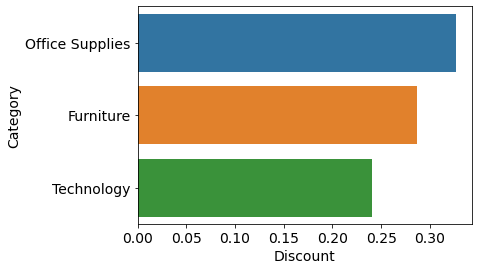

In [18]:
disc_cat = df_discount.groupby('Category')['Discount'].mean().sort_values(ascending=False)
sns.barplot(x=disc_cat,y=disc_cat.index)
plt.show()

In [ ]:
## Average discount % is high for Office Supplies products

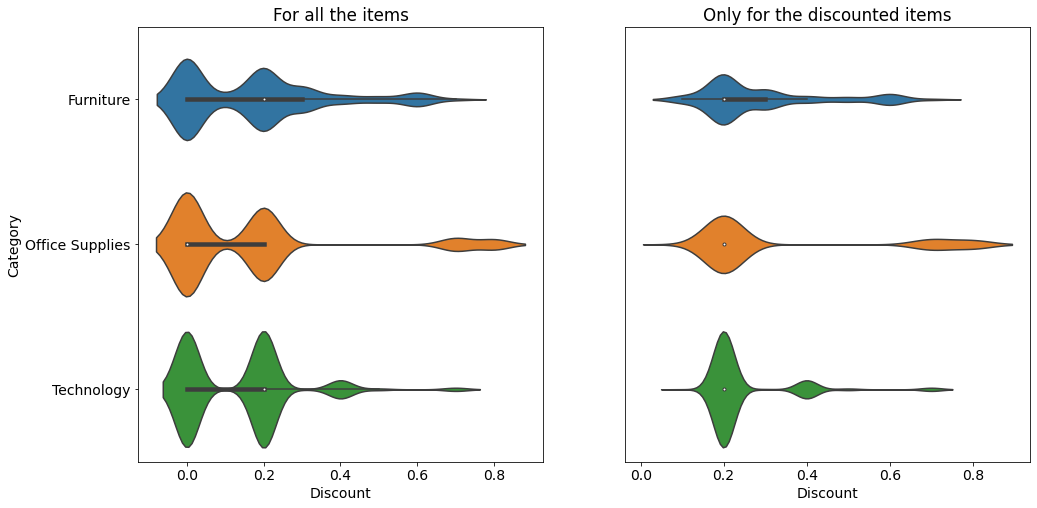

In [19]:
plt.figure(figsize=(16,8))
ax1, ax2 = plt.subplot(1,2,1), plt.subplot(1,2,2)

sns.violinplot(data=df,x='Discount',y='Category',inner='box',ax=ax1)
ax1.set_title('For all the items')
sns.violinplot(data=df_discount,x='Discount',y='Category',inner='box',ax=ax2,sharex=ax1)
ax2.set_title('Only for the discounted items')
ax2.set_yticks([])
ax2.set_ylabel('')

plt.show()

In [ ]:
## --> for all the categories 
## 1) Purchases with 0 % discount are high
## 2) and for the discounted purchases, median discount is 20%

## --> For office supplies, we can see distribution at around 80% which is the max
## --> For technology, thers are some items discounted at around 40%
## --> Furnitures have a wide range of discounts available

In [20]:
print(df.iloc[df_discount.Discount.idxmax()][['Segment','Category','Sub-Category','Quantity','Discount','Profit']])

Segment             Home Office
Category        Office Supplies
Sub-Category         Appliances
Quantity                      5
Discount                    0.8
Profit                 -123.858
Name: 14, dtype: object


In [ ]:
## The max discount of 80% was provided for a 5 items Office Supplies purchase which resulted in a loss of $123

## Function Definition for plotting sales and profit against other features

In [21]:
def sales_profit(col,filter_col=None,filter_condition=None,n=5):
    
    if (filter_col == None) | (filter_condition == None):
        new_df = df
        a = ''
    else:
        new_df = df[df[filter_col]==filter_condition]
        a = 'In {} as {},'.format(filter_col,filter_condition)
    
    print('Sales Contribution by {}\n'.format(col))
    print(new_df[col].value_counts().head(10))
    
    fig = plt.figure(figsize=(16, 12))
    gs = fig.add_gridspec(nrows = 2, ncols = 4,  width_ratios=(2, 2, 2, 2), height_ratios=(2, 2),
                          left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.8, hspace=0.2)
    font_title ={'fontsize':20,'family': 'sans-serif','color':  'darkred','weight': 'normal','size': 20}

    ax_pie = fig.add_subplot(gs[0, 1:3])
    sales = (new_df.groupby(col).Sales.sum().sort_values(ascending=False)*100/new_df.Sales.sum())
    if len(sales) > 10:
        sns.barplot(x=sales.head(15),y=sales.head(15).index,ax=ax_pie)
        ax_pie.set_title('{} \nTop 15 Revenue contributing {}'.format(a,col),fontdict=font_title)
    elif len(sales) > 5:
        ax_pie.pie(sales,autopct='%.2f%%',textprops={'fontsize':16,'color':'white'})
        ax_pie.set_title('{} \nRevenue contribution by {}'.format(a,col),fontdict=font_title)
        ax_pie.legend(bbox_to_anchor=(1,1))
    else:
        ax_pie.pie(sales,autopct='%.2f%%',labels=sales.index,textprops={'fontsize':16,'color':'white'})
        ax_pie.set_title('{} \nRevenue contribution by {}'.format(a,col),fontdict=font_title)
        ax_pie.legend(bbox_to_anchor=(1,1))
    

    ax_sales = fig.add_subplot(gs[1,:2])
    avg_sales = (new_df.groupby(col).Sales.mean().sort_values(ascending=False)).head(5)
    sns.barplot(x=avg_sales.values,y=avg_sales.index)
    ax_sales.set_title('Average Revenue per purchase by {}'.format(col),fontdict=font_title)
    ax_sales.set_xlabel('Revenue')

    ax_profit = fig.add_subplot(gs[1,2:])
    avg_profit = (new_df.groupby(col).Profit.mean().sort_values(ascending=False)).head(5)
    sns.barplot(x=avg_profit.values,y=avg_profit.index)
    ax_profit.set_title('Average Profit per purchase by {}'.format(col),fontdict=font_title)
    ax_profit.set_xlabel('Profit')
    ax_profit.set_ylabel('')

    plt.show()

## Which region of US yields least sales and profit and why?

Sales Contribution by Region

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64


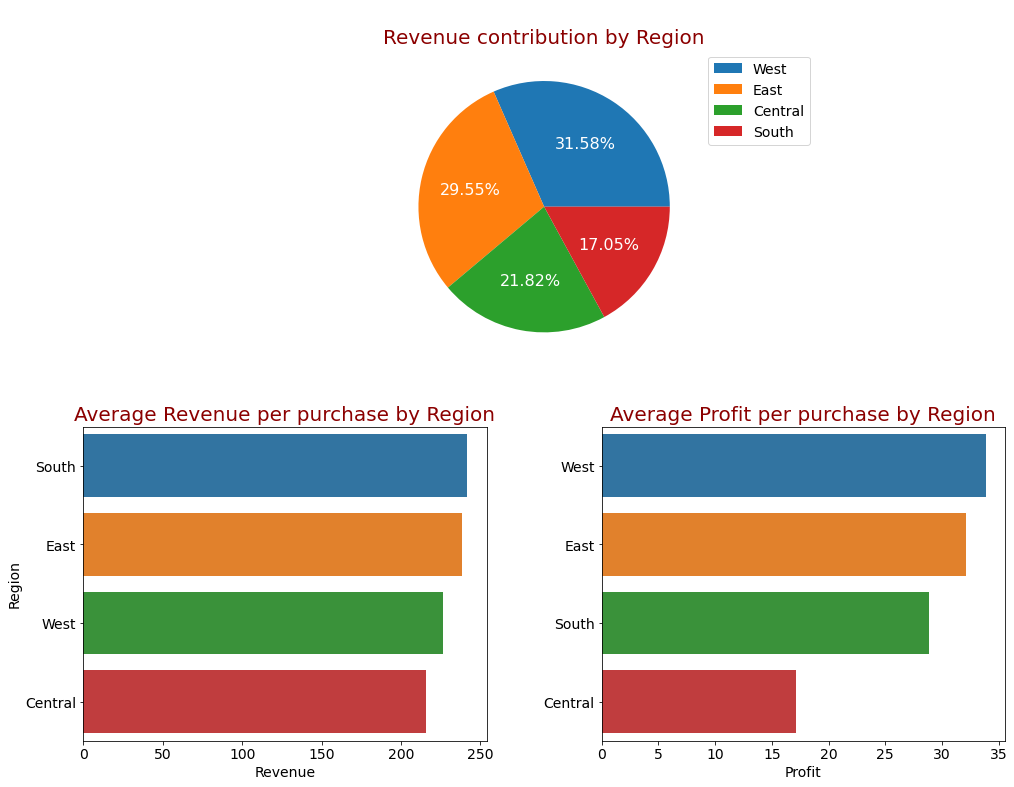

In [22]:
sales_profit(col='Region')

In [ ]:
## Inference:
## 1) West and East regions contribute to 60% of the revenue
## 2) Central regions of US produce significantly low average profit per purchase. Further research needs to be done

Sales Contribution by Category

Office Supplies    1422
Furniture           481
Technology          420
Name: Category, dtype: int64


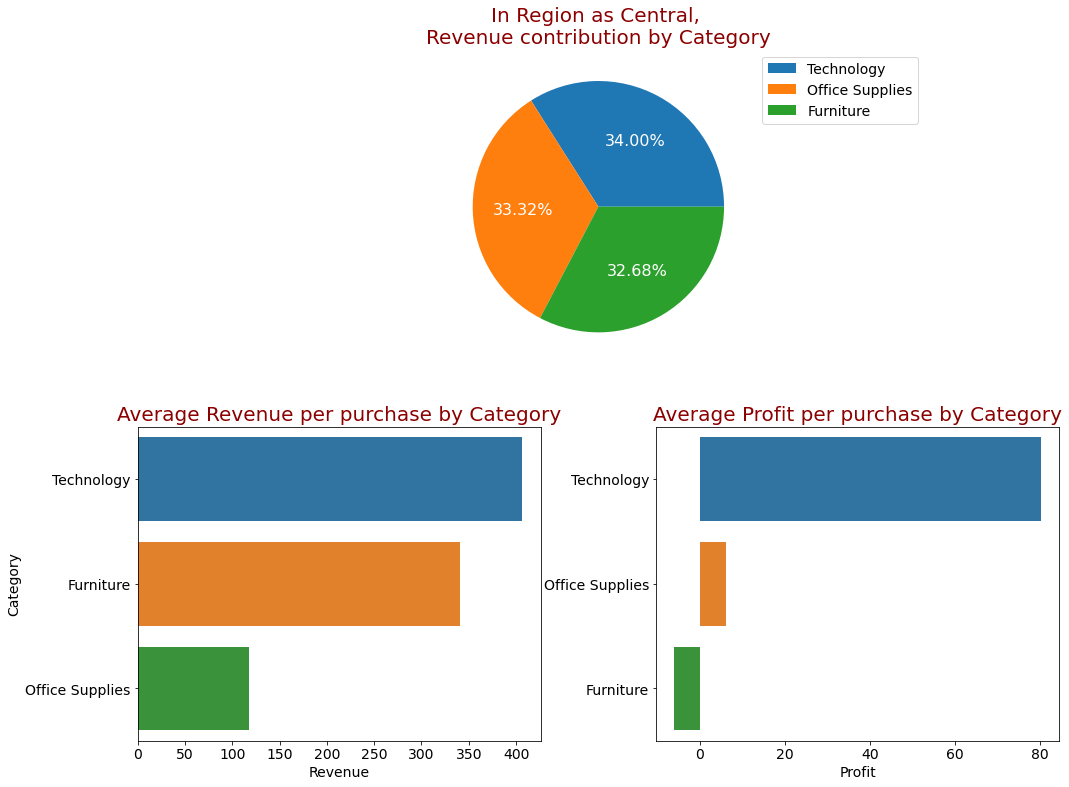

In [23]:
sales_profit(col='Category',filter_col='Region',filter_condition='Central')

In [ ]:
## On further analysis, it is found that furniture business in Central US, 
## Furniture business contributing for 33% of the market share is in loss leading to significant drop in profit

## State wise Analysis

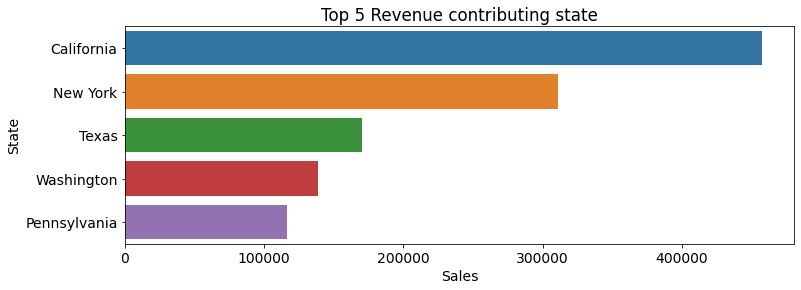

In [24]:
tot_sales_state = (df.groupby('State').Sales.sum().sort_values(ascending=False))
plt.figure(figsize=(12,4))
sns.barplot(x=tot_sales_state.head(),y=tot_sales_state.head().index)
plt.title('Top 5 Revenue contributing state')
plt.show()

## Which city yields high sales and profit?

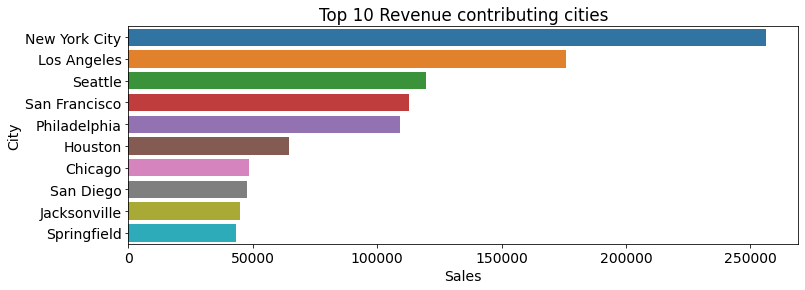

In [25]:
tot_sales_city = (df.groupby('City').Sales.sum().sort_values(ascending=False))
plt.figure(figsize=(12,4))
sns.barplot(x=tot_sales_city.head(10),y=tot_sales_city.head(10).index)
plt.title('Top 10 Revenue contributing cities')
plt.savefig('top_rev_city.png')
plt.show()

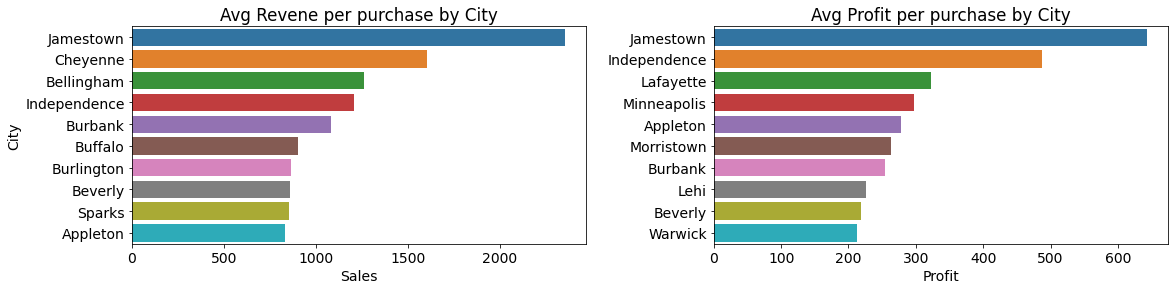

In [26]:
sales_city = (df.groupby('City').Sales.mean().sort_values(ascending=False))
profit_city = (df.groupby('City').Profit.mean().sort_values(ascending=False))

fig = plt.figure(figsize=(16, 4))
gs = fig.add_gridspec(nrows = 1, ncols = 2,  width_ratios=(2, 2),  left=0.05, right=0.95, wspace=0.28)

ax_rev = fig.add_subplot(gs[0, 0])
sns.barplot(x=sales_city.head(10),y=sales_city.head(10).index,ax=ax_rev)
ax_rev.set_title('Avg Revene per purchase by City')

ax_pro = fig.add_subplot(gs[0, 1])
sns.barplot(x=profit_city.head(10),y=profit_city.head(10).index,ax=ax_pro)
ax_pro.set_title('Avg Profit per purchase by City')
ax_pro.set_ylabel('')

plt.show()

In [ ]:
## Inference :
## 1) Major revenue generating cities are New York, Los Angeles, Seattle, San Francisco and Phildelphia
## 2) Jameston, Independence, Appleton, Burbank and Beverly seems to be a good market to target

## Does ship mode has relation with sales and profit?

Sales Contribution by Ship Mode

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64


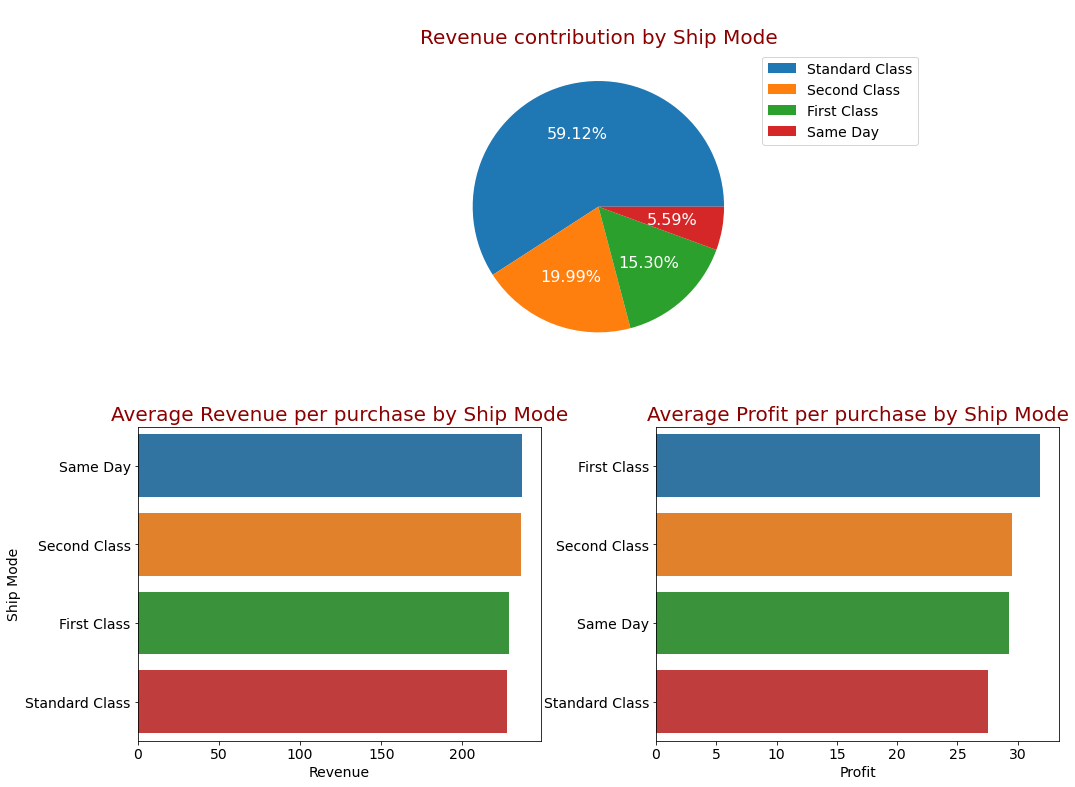

In [27]:
sales_profit('Ship Mode')

In [ ]:
## Inference :
## 1) Standard Class is the dominant Shipping mode of Sales but has the least contribution to average revenue and profit per purchase
## 2) Same day is the minority of the Shipping modes accounting for 5% but has the highest average revenue per purchase
## 3) First Class shipping mode has the maximum average profit per purchase

## Which segment provides high sales and profit?

Sales Contribution by Segment

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64


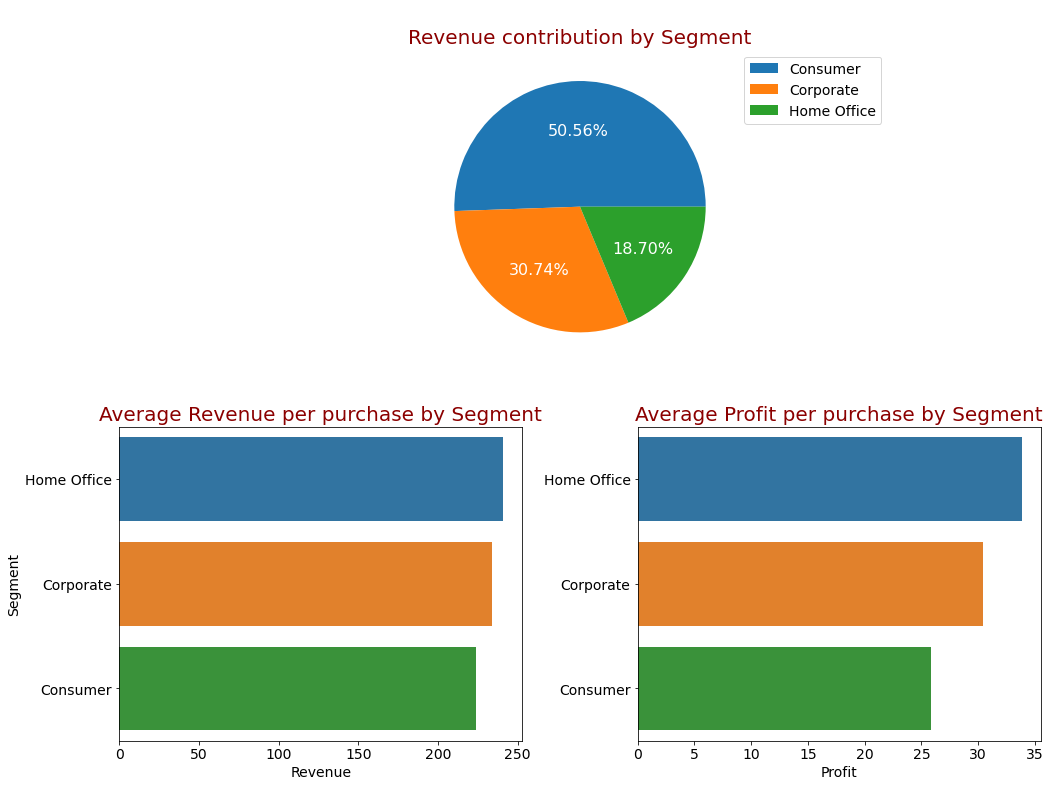

In [28]:
sales_profit('Segment')

In [ ]:
## Inference :
## 1) We have more sales in 'Consumer' segment but with least average revenue and profit per purchase compared
## 2) 'Home office' has the highest average revenue and profit per purchase 

## Which category yields high sales and profit?

Sales Contribution by Category

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


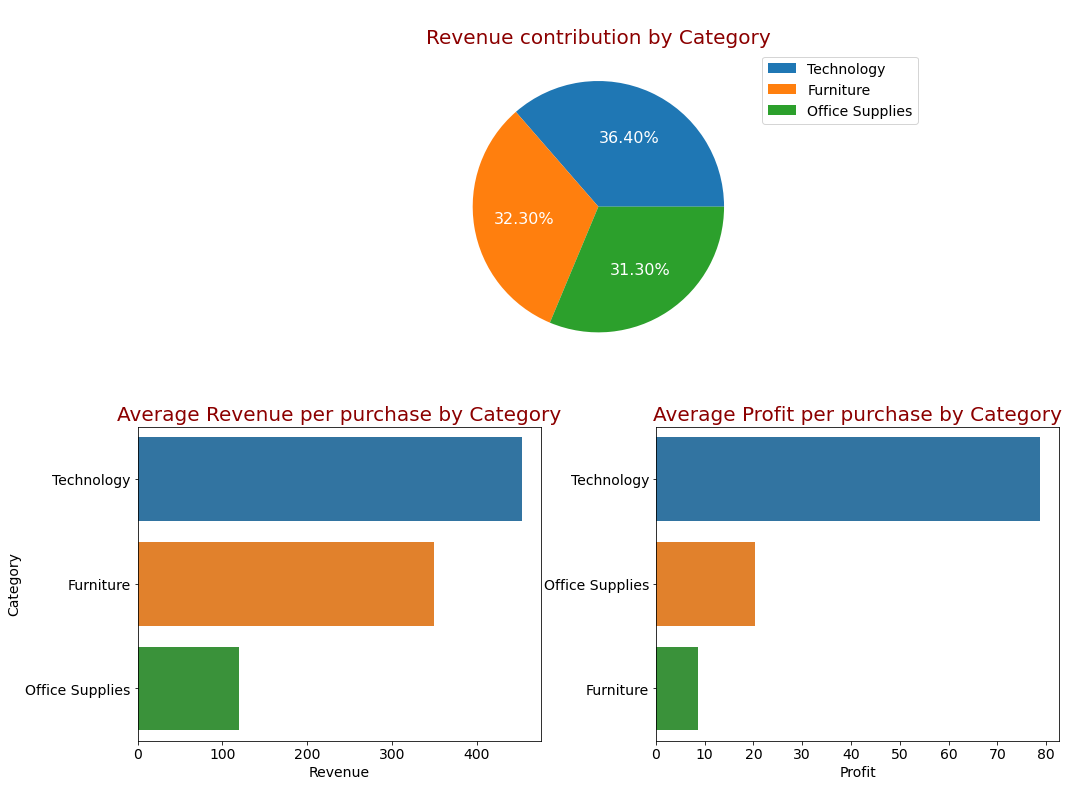

In [29]:
sales_profit('Category')

In [ ]:
## Inference :
## 1) Revenue contribution is almost equally distributed between the categories
## 2) Technology leads with higher avg sales and profit per purchase
## 3) Furniture category purchases yields the least avg profit

## In Technology, Which sub-category yields high sales and profit?

Sales Contribution by Sub-Category

Phones         889
Accessories    775
Machines       115
Copiers         68
Name: Sub-Category, dtype: int64


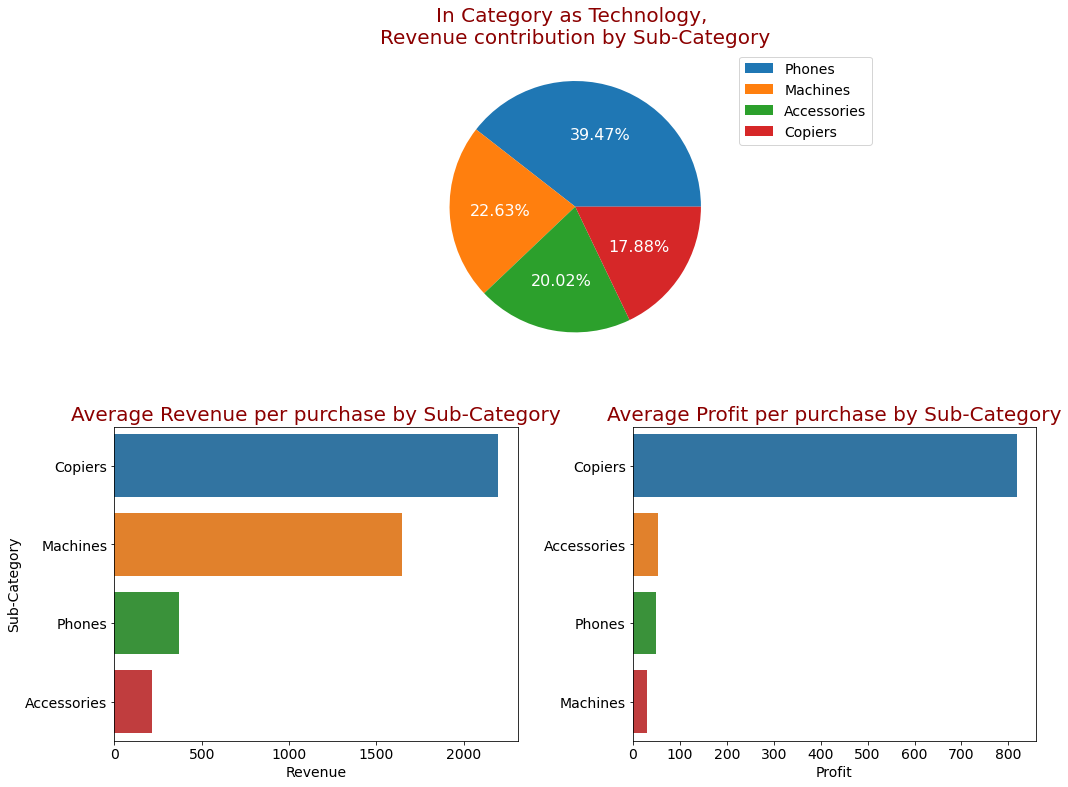

In [30]:
sales_profit(col='Sub-Category',filter_col='Category',filter_condition='Technology')

In [ ]:
## Inference :
## 1) Phones are the frequently purchased technology in the store
## 2) Surprisingly, Selling a unit of copier gives almost 10 times more profit than selling a unit product from any other
##    sub category in Technology

## Conclusion

## Hence, EDA helped us in understanding the sales information and helped us infer business related inferences

Important Inferences are:
    
1. In Central US, the furniture business is in loss and it is a concern to be addressed
2. Company gets high revenue from popular cities such New York, Los Angeles and Seattle, but small cities such as Jameston, Independence shows promise with high average revenue and profit per purchase
3. Technology products give the best average profit per purchase
4. In technology related products, copier gives 10x profit compared with any other sub category
5. Company should promote 'First Class' shipping modes for better revenue and profit per purchase 